
# Lab | Customer Analysis Round 7

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise.
Some approaches you can try in this exercise:

- use the concept of multicollinearity and remove insignificant variables
- use a different method of scaling the numerical variables
- use a different ratio of train test split
- use the transformation on numerical columns which align it more towards a normal distribution

### Get the data

We are using the `marketing_customer_analysis.csv` file.

### Dealing with the data

Already done in rounds 2 to 7.

**Bonus**: Build a function, from round 2 and round 7, to clean and process the data.

### Explore the data

Done in the round 3.

### Modeling

Description:

- Try to improve the linear regression model.

## Getting the Data

In [1]:
import pandas as pd
import numpy as np

In [106]:
data = pd.read_csv('/Users/felixley/Ironhack/Data Analytics Course/Week1/Day5/lab-customer-analysis-round-7/files_for_lab/csv_files/marketing_customer_analysis.csv')

## Inspecting the data

In [107]:
# Indexing Customer

In [108]:
data = data.set_index("Customer")

In [5]:
data.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
# Dealing with the Data

In [7]:
# searching for NA

In [8]:
data.isna().sum()

State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [9]:
# Getting an overview about the data

In [10]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [11]:
# Transforming the data describtion

In [12]:
num_T = data.describe().T

In [13]:
num_T.head()

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.38119
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.00000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.00000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.00000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.00000


In [14]:
data.shape

(9134, 23)

In [15]:
# dropping duplicates

In [16]:
data = data.drop_duplicates()
data.shape

(8971, 23)

In [17]:
# Splitting numericals and categoricals

In [18]:
num = data.select_dtypes(np.number)
cat = data.select_dtypes(np.object)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8971 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          8971 non-null   object 
 1   Customer Lifetime Value        8971 non-null   float64
 2   Response                       8971 non-null   object 
 3   Coverage                       8971 non-null   object 
 4   Education                      8971 non-null   object 
 5   Effective To Date              8971 non-null   object 
 6   EmploymentStatus               8971 non-null   object 
 7   Gender                         8971 non-null   object 
 8   Income                         8971 non-null   int64  
 9   Location Code                  8971 non-null   object 
 10  Marital Status                 8971 non-null   object 
 11  Monthly Premium Auto           8971 non-null   int64  
 12  Months Since Last Claim        8971 non-null

In [20]:
# Checking for Null-values

In [21]:
data.isin([0]).sum()

State                               0
Customer Lifetime Value             0
Response                            0
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                           2296
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           312
Months Since Policy Inception      80
Number of Open Complaints        7114
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                       0
Vehicle Size                        0
dtype: int64

## Plotting

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
num_col = list(num.columns)

for i in num_col:
    sns.displot([num[i]])
    

NameError: name 'num' is not defined

In [24]:
# Checking for correlations

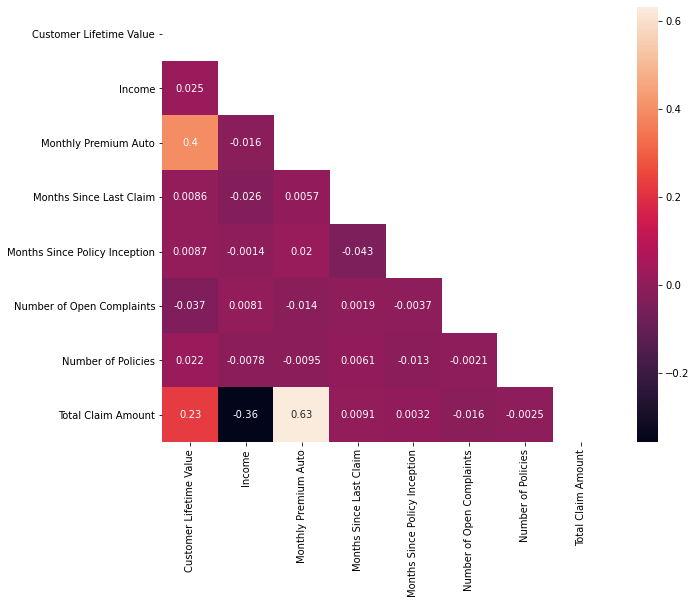

In [25]:
correlations_matrix = num.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [26]:
# dropping customer lifetime value 

In [27]:
num_drop1 = num.drop(['Customer Lifetime Value'], axis=1)

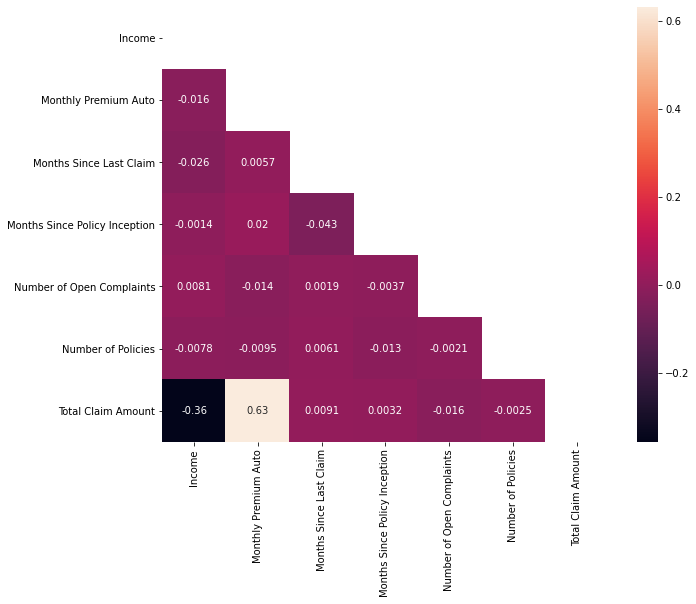

In [28]:
correlations_matrix = num_drop1.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [29]:
num_drop2 = num_drop1.drop(['Income'], axis=1)

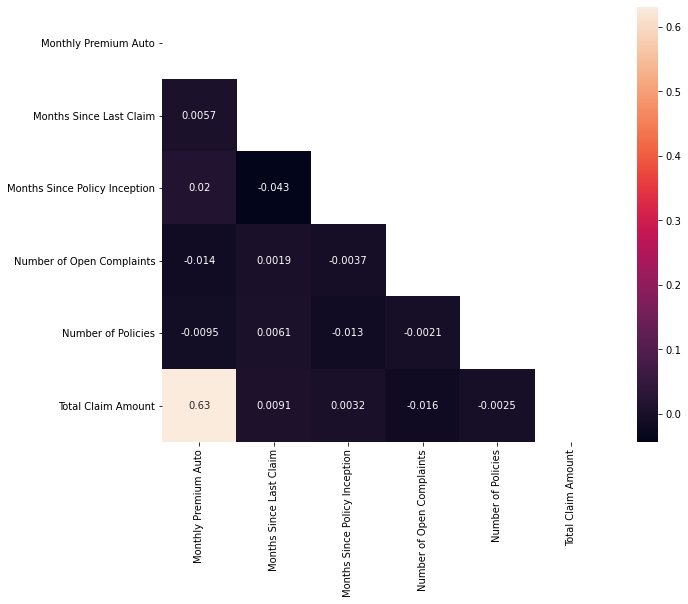

In [30]:
correlations_matrix = num_drop2.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [31]:
# handle date differences

In [32]:
data['Effective To Date'].unique()

array(['2/24/11', '1/31/11', '2/19/11', '1/20/11', '2/3/11', '1/25/11',
       '1/18/11', '1/26/11', '2/17/11', '2/21/11', '1/6/11', '2/6/11',
       '1/10/11', '1/17/11', '1/5/11', '2/27/11', '1/14/11', '1/21/11',
       '2/5/11', '1/29/11', '2/28/11', '2/12/11', '2/2/11', '2/7/11',
       '1/22/11', '2/13/11', '1/15/11', '1/8/11', '1/11/11', '1/28/11',
       '2/8/11', '2/23/11', '1/2/11', '2/16/11', '1/27/11', '1/23/11',
       '1/9/11', '2/11/11', '2/4/11', '2/1/11', '2/15/11', '2/26/11',
       '1/16/11', '1/1/11', '2/10/11', '1/24/11', '2/25/11', '1/12/11',
       '2/9/11', '1/19/11', '1/4/11', '2/14/11', '2/20/11', '2/18/11',
       '1/3/11', '1/13/11', '1/30/11', '2/22/11', '1/7/11'], dtype=object)

In [33]:
# Dropping Date column because all dates are in 2011

In [34]:
cat.drop(['Effective To Date'], axis=1, inplace=True)

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
# Boxplot Ordinals

In [36]:
cat.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [37]:
ordi=pd.DataFrame(columns=["Coverage", "Education", "EmploymentStatus", "Vehicle Class", "Vehicle Size"],data=cat)
ordi.head()

,Coverage,Education,EmploymentStatus,Vehicle Class,Vehicle Size
Customer,,,,,
BU79786,Basic,Bachelor,Employed,Two-Door Car,Medsize
QZ44356,Extended,Bachelor,Unemployed,Four-Door Car,Medsize
AI49188,Premium,Bachelor,Employed,Two-Door Car,Medsize
WW63253,Basic,Bachelor,Unemployed,SUV,Medsize
HB64268,Basic,Bachelor,Employed,Four-Door Car,Medsize


In [38]:
def boxplot_ordinals(ordinal, target):
    df = pd.DataFrame(data= [cat[ordinal], data[target]])
    df = df.T
    sns.boxplot(x=ordinal, y=target, data=df)
    plt.show()
    return plt.show()

Coverage


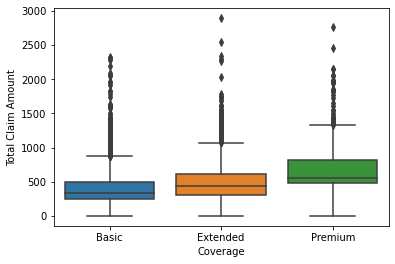

Education


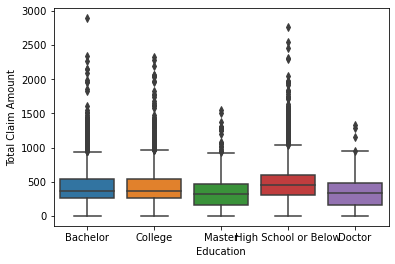

EmploymentStatus


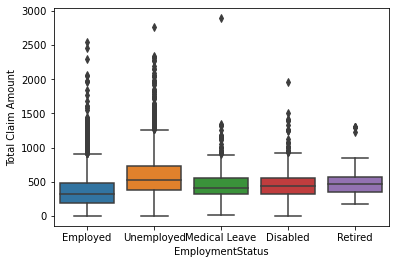

Vehicle Class


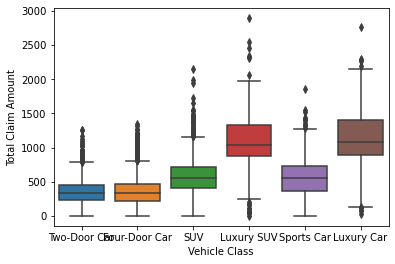

Vehicle Size


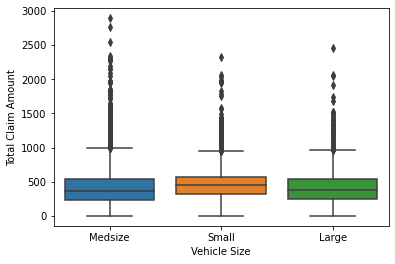

In [39]:
for i in list(ordi.columns):
    print(i)
    boxplot_ordinals(i, 'Total Claim Amount')

In [40]:
# dropping EmploymentStatus

In [41]:
ordi.drop('EmploymentStatus', axis=1, inplace=True)

In [42]:
# Ranking ordinals

In [43]:
coverage_dict = {'Basic':0,'Extended':1,'Premium':2}
ordi['Coverage'] = ordi['Coverage'].map(coverage_dict)
education_dict = {'High School or Below': 0, 'College':1, 'Bachelor':2,'Master':3,'Doctor':4}
ordi['Education'] = ordi['Education'].map(education_dict)
vehicle_class_dict = {'Two-Door Car':0, 'Four-Door Car':0, 'SUV':1, 'Luxury SUV':2, 'Sports Car':1,'Luxury Car':2}
ordi['Vehicle Class'] = ordi['Vehicle Class'].map(vehicle_class_dict)
vehicle_dict = {'Small':0,'Medsize':1,'Large':2 }
ordi['Vehicle Size'] = ordi['Vehicle Size'].map(vehicle_dict)

In [44]:
ordi.head()

,Coverage,Education,Vehicle Class,Vehicle Size
Customer,,,,
BU79786,0,2,0,1
QZ44356,1,2,0,1
AI49188,2,2,0,1
WW63253,0,2,1,1
HB64268,0,2,0,1


In [45]:
# dropping ordinals from categoricals data frame

In [46]:
cat.drop(list(ordi.columns), axis=1, inplace=True)

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [47]:
cat.head()

,State,Response,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel
Customer,,,,,,,,,,
BU79786,Washington,No,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent
QZ44356,Arizona,No,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent
AI49188,Nevada,No,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent
WW63253,California,No,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center
HB64268,Washington,No,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent


In [48]:
# Concat num and ordi

In [49]:
num = pd.concat([num, ordi], axis=1)

In [50]:
num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Coverage,Education,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147,0,2,0,1
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935,1,2,0,1
AI49188,12887.431650,48767,108,18,38,0,2,566.472247,2,2,0,1
WW63253,7645.861827,0,106,18,65,0,7,529.881344,0,2,1,1
HB64268,2813.692575,43836,73,12,44,0,1,138.130879,0,2,0,1


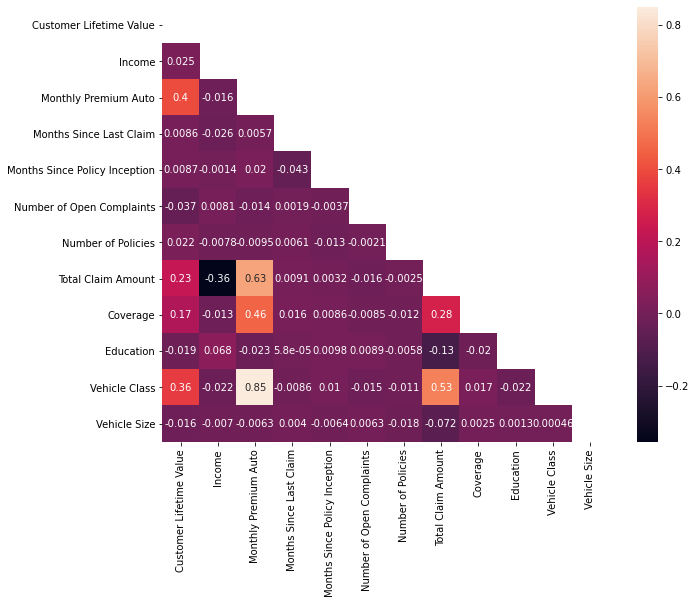

In [51]:
correlations_matrix = num.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [205]:
# Removing Outliers (skipped)

In [206]:
#from scipy import stats
#from scipy.stats import skew
#from scipy.stats import kurtosis

In [207]:
#num.isin([0]).sum()

In [208]:
#num.apply(skew)

In [209]:
num_wa_0 = ['Customer Lifetime Value', 'Monthly Premium Auto', 'Number of Policies', 'Total Claim Amount']

In [210]:
def boxcox_trans(column):
    xt, lmbda = stats.boxcox(num[column])
    sns.distplot(xt)
    plt.show()
    return plt.show(), xt

In [211]:
#boxcox_trans()

In [212]:
for i in num_wa_0:
    print(i)
    boxcox_trans(i)
    

In [88]:
# X - Y Split

In [91]:
Y = num['Total Claim Amount']
num_X = num.drop(['Total Claim Amount'], axis = 1)

In [92]:
num_X.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Coverage,Education,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,0,2,0,1
QZ44356,6979.535903,0,94,13,42,0,8,1,2,0,1
AI49188,12887.431650,48767,108,18,38,0,2,2,2,0,1
WW63253,7645.861827,0,106,18,65,0,7,0,2,1,1
HB64268,2813.692575,43836,73,12,44,0,1,0,2,0,1


In [94]:
# Encoding categoricals

In [95]:
from sklearn.preprocessing import OneHotEncoder

In [109]:
df_index = cat.index
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(cat) 
# 'drop' ignores the first value of each categorical feature

print("The possible values of cat are: ",encoder.categories_)

# This will create as many columns as possible values has the column - 1. Each column will be binnary valued
# 1/0 wether if the corresponding value is in the column or not.
encoded = encoder.transform(cat).toarray()
encoded

The possible values of cat are:  [array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['No', 'Yes'], dtype=object), array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Rural', 'Suburban', 'Urban'], dtype=object), array(['Divorced', 'Married', 'Single'], dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
       'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
       'Special L3'], dtype=object), array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object), array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object)]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [110]:
encoding_columns = encoder.get_feature_names()
print(encoding_columns)

['x0_California' 'x0_Nevada' 'x0_Oregon' 'x0_Washington' 'x1_Yes'
 'x2_Employed' 'x2_Medical Leave' 'x2_Retired' 'x2_Unemployed' 'x3_M'
 'x4_Suburban' 'x4_Urban' 'x5_Married' 'x5_Single' 'x6_Personal Auto'
 'x6_Special Auto' 'x7_Corporate L2' 'x7_Corporate L3' 'x7_Personal L1'
 'x7_Personal L2' 'x7_Personal L3' 'x7_Special L1' 'x7_Special L2'
 'x7_Special L3' 'x8_Offer2' 'x8_Offer3' 'x8_Offer4' 'x9_Branch'
 'x9_Call Center' 'x9_Web']


In [113]:
cat_encoded = pd.DataFrame(data=encoded, columns=encoding_columns, index = df_index)
cat_encoded.head()

,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_Yes,x2_Employed,x2_Medical Leave,x2_Retired,x2_Unemployed,x3_M,...,x7_Personal L3,x7_Special L1,x7_Special L2,x7_Special L3,x8_Offer2,x8_Offer3,x8_Offer4,x9_Branch,x9_Call Center,x9_Web
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
QZ44356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
AI49188,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WW63253,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
HB64268,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Concat the numerical Data Frames

In [157]:
X = pd.concat([num_X, cat_encoded], axis=1)
df_index = X.index
X.shape

(8971, 41)

In [150]:
Y_df = pd.DataFrame(Y)
Y

Customer
BU79786     384.811147
QZ44356    1131.464935
AI49188     566.472247
WW63253     529.881344
HB64268     138.130879
              ...     
YM19146     541.282007
LA72316     198.234764
TD14365     790.784983
UP19263     691.200000
Y167826     369.600000
Name: Total Claim Amount, Length: 8971, dtype: float64

In [115]:
# train-test-split

In [116]:
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [168]:
X_train.shape

(6279, 41)

fit normalizer to train set

apply the normalizer to both training sets

In [137]:
# Scale Numericals (Normalizer or StandardScaler or MinMaxScaler)

In [138]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [159]:
# fitting transformer to our training set
x_transformer = StandardScaler().fit(X_train)

# transforming our training sets
x_train_transformed = pd.DataFrame(transformer.transform(X_train), columns = X.columns)
x_test_transformed = pd.DataFrame(transformer.transform(X_test), columns = X.columns)


In [ ]:
# set the index again

In [171]:
x_train_transformed.index = X_train.index

In [172]:
x_test_transformed.index = X_test.index

In [173]:
# training the model

In [175]:
from sklearn import linear_model

In [201]:
lm = linear_model.LinearRegression()

# We "train" our linear model based on the data available on X_train and y_train
model = lm.fit(X_train,y_train)

In [202]:
# Making predictions

In [203]:
# We make predictions on X_test
predictions  = lm.predict(X_test)
predictions_df = pd.DataFrame(predictions)
predictions_df.head()

,0
0,548.552316
1,393.485505
2,413.649425
3,362.158451
4,202.737986


In [180]:
# Evaluating our linear model  with r2 value and adjusted r2

In [181]:
from sklearn.metrics import mean_squared_error, r2_score

In [187]:
r2 = r2_score(y_test, predictions)
print("The R2 of the linear model is: ",round(r2_score(y_test, predictions),3))

The R2 of the linear model is:  0.782


In [190]:
N = len(X_test)
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(N-1)/(N-p-1))
print("The adjusted r2 value on the TEST set is: ",round(adj_r2,3))

The adjusted r2 value on the TEST set is:  0.779


In [213]:
# Creating another linear model with Statsdata (OLS)

In [193]:
import statsmodels.api as sm

In [200]:
X = sm.add_constant(X) 
ols = sm.OLS(Y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     774.0
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:23:43   Log-Likelihood:                -57001.
No. Observations:                8971   AIC:                         1.141e+05
Df Residuals:                    8931   BIC:                         1.144e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         